### Fit a univariate cubic cyclic spline

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from pymgcv import Linear
from pymgcv import Smooth as S
from pymgcv.gam import gam
from pymgcv.plot import plot_1d
from pymgcv.plot import plot_smooth_2d

import matplotlib.pyplot as plt

n = 500
rng = np.random.default_rng(42)

x0 =  rng.normal(0, 1, size=n)
x1 = rng.normal(0, 1, size=n)
x2 = rng.normal(0, 1, size=n)
x3 = rng.normal(0, 1, size=n)
y = 0.2*x0 + np.cos(x1) + 0.2*x2 + 1*x3**2 + 3 + rng.normal(0, 1, size=n)

data = {"x0": x0, "x1": x1, "x2": x2, "x3": x3, "y": y }

In [5]:
terms = [Linear("x0"), S("x1","x2"), S("x3")]

fitted_gam = gam(
    dependent="y",
    terms=terms,
    data=data,
)

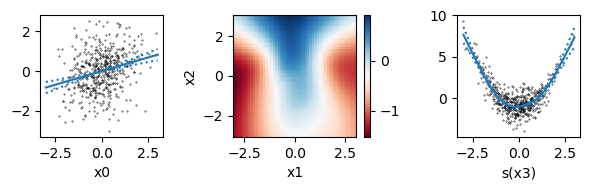

In [6]:

fig, axes = plt.subplots(
    ncols=len(terms),
    width_ratios=[2, 2.5, 2],
    )

plot_1d(terms[0], fitted_gam, (-3, 3), ax=axes[0], data=data, partial_residual_kwargs={"s": 0.1})
plot_smooth_2d(terms[1], fitted_gam, x1_lims=(-3, 3), x2_lims=(-3, 3), ax=axes[1])
plot_1d(terms[2], fitted_gam, (-3, 3), ax=axes[2], data=data, partial_residual_kwargs={"s": 0.1})
fig.set_size_inches(6, 2, forward=True)
fig.tight_layout()

In [10]:
print(fitted_gam.summary())  # TODO to print_summary function?


Family: gaussian 
Link function: identity 

Formula:
y ~ x0 + s(x1, x2) + s(x3)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.62866    0.04505 102.742  < 2e-16 ***
x0           0.27702    0.04781   5.794 1.25e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
            edf Ref.df       F p-value    
s(x1,x2) 12.310 16.852   6.587  <2e-16 ***
s(x3)     5.546  6.738 153.513  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.709   Deviance explained =   72%
GCV = 1.0566  Scale est. = 1.0146    n = 500
